### Import libraries

In [67]:
import pandas as pd
import pandas_datareader.data as pdr
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import requests
import json

/var/folders/ly/0xqts46d0xb6mpwwrttmy0tc0000gq/T/ipykernel_17100/1676161824.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### Some issues with importing DATA

In [68]:
from dontshare_config import ALPHA_VANTAGE_API_KEY

In [69]:
response = requests.get(f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey={ALPHA_VANTAGE_API_KEY}')
alphadict = json.loads(response.text)
alphadict.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [70]:
stock = pd.DataFrame(alphadict['Time Series (Daily)']).T
stock.info() # Dtypes are not right, need to make them float, index is not a datetime

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2023-08-11 to 2023-03-21
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   1. open    100 non-null    object
 1   2. high    100 non-null    object
 2   3. low     100 non-null    object
 3   4. close   100 non-null    object
 4   5. volume  100 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [71]:
type(stock.index) # we need to convert the index to datetime

pandas.core.indexes.base.Index

In [72]:
stock.index = pd.to_datetime(stock.index)
type(stock.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [73]:
stock.columns # we need to shorten this column names

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

In [74]:
stock.columns = ['open','high','low','close','volume']
stock.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

Convert to FLOAT

In [75]:
stock = stock.astype(float)

### Results

In [76]:
stock.sample(10)

,open,high,low,close,volume
2023-07-17,345.678,346.9900,342.20,345.73,20363927.0
2023-04-03,286.520,288.2700,283.95,287.23,24883342.0
2023-06-15,337.480,349.8400,337.20,348.10,38899075.0
2023-04-27,295.970,305.2000,295.25,304.83,46462638.0
2023-04-04,287.230,290.4499,285.67,287.18,25824299.0
2023-06-08,323.935,326.6400,323.35,325.26,23277708.0
2023-04-24,282.090,284.9500,278.72,281.77,26611014.0
2023-03-31,283.730,289.2700,283.00,288.30,32765976.0
2023-07-20,353.570,357.9700,345.37,346.87,33778395.0
2023-07-31,336.920,337.6950,333.36,335.92,25446022.0


### Summarize data

In [77]:
stock.describe()

,open,high,low,close,volume
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,316.980630,320.143980,314.018838,317.145200,2.827539e+07
std,23.254363,23.773212,22.743493,23.104035,1.024345e+07
min,273.400000,275.000000,269.519100,272.290000,1.250869e+07
25%,294.870000,297.697500,291.300000,294.427500,2.226187e+07
50%,324.505000,327.685000,321.840000,324.320000,2.563516e+07
75%,335.115000,338.120000,333.125000,335.867500,3.001596e+07
max,361.750000,366.780000,352.435000,359.490000,6.940538e+07


### Visualize Data

<Axes: >

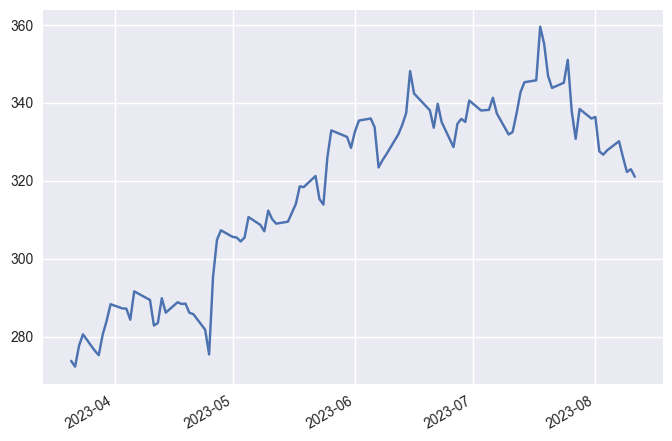

In [78]:
stock['close'].plot()

### Exploring signals

<Axes: >

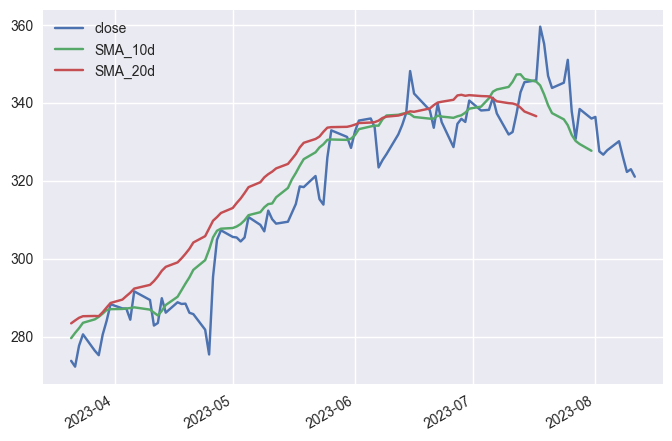

In [79]:
stock['SMA_10d'] = stock['close'].rolling(10).mean()
stock['SMA_20d'] = stock['close'].rolling(20).mean()
stock[['close', 'SMA_10d', 'SMA_20d']].plot()

We see another issue here `THE SMA SHOULD ALWAYS BE DEFINED AT THE END OF THE SERIES` so `SOMETHING IS WRONG`

In [80]:
stock.head() # we find that the data is in descending order, we need ASCENDING

,open,high,low,close,volume,SMA_10d,SMA_20d
2023-08-11,320.260,322.41,319.2100,321.01,24355491.0,NaN,NaN
2023-08-10,326.015,328.26,321.1800,322.93,20113725.0,NaN,NaN
2023-08-09,326.470,327.11,321.0499,322.23,22373268.0,NaN,NaN
2023-08-08,326.960,328.75,323.0000,326.05,22327574.0,NaN,NaN
2023-08-07,328.370,331.11,327.5200,330.11,17741526.0,NaN,NaN


In [81]:
stock = stock.sort_index(ascending=True) 

<Axes: >

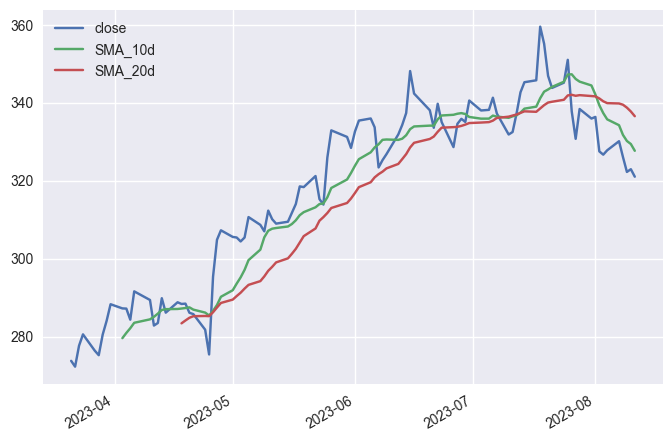

In [82]:
stock['SMA_10d'] = stock['close'].rolling(10).mean()
stock['SMA_20d'] = stock['close'].rolling(20).mean()
stock[['close', 'SMA_10d', 'SMA_20d']].plot()

`ISSUSE IS FIXED!`

### Missing Data and how to process it

In [83]:
stock.head()

,open,high,low,close,volume,SMA_10d,SMA_20d
2023-03-21,274.88,275.0000,269.5191,273.78,34558704.0,NaN,NaN
2023-03-22,273.40,281.0400,272.1800,272.29,34873330.0,NaN,NaN
2023-03-23,277.94,281.0600,275.2000,277.66,36610879.0,NaN,NaN
2023-03-24,277.24,280.6300,275.2800,280.57,28199962.0,NaN,NaN
2023-03-27,280.50,281.4589,275.5200,276.38,26840212.0,NaN,NaN


              open     high       low   close      volume  SMA_10d   SMA_20d
2023-04-18  291.57  291.755  287.0100  288.37  20161845.0  287.198  283.3990
2023-04-19  285.99  289.050  284.5400  288.45  17150271.0  287.325  284.1325
2023-04-20  285.25  289.030  285.0800  286.11  23244363.0  287.502  284.8235
2023-04-21  285.01  286.270  283.0608  285.76  21676387.0  286.918  285.2285
2023-04-24  282.09  284.950  278.7200  281.77  26611014.0  286.156  285.2885


<Axes: >

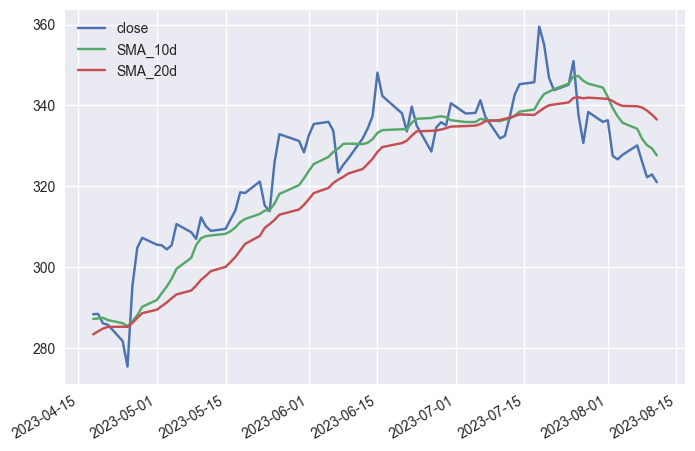

In [84]:
# getting rid of missing data
stock = stock.dropna()
print(stock.head())
stock[['close', 'SMA_10d', 'SMA_20d']].plot()

In [105]:
with open('../test_data/stock.pkl', 'w') as file:
    file.write(stock.to_csv(index=True))

In [106]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81 entries, 2023-04-18 to 2023-08-11
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   open     81 non-null     float64
 1   high     81 non-null     float64
 2   low      81 non-null     float64
 3   close    81 non-null     float64
 4   volume   81 non-null     float64
 5   SMA_10d  81 non-null     float64
 6   SMA_20d  81 non-null     float64
dtypes: float64(7)
memory usage: 5.1 KB


In [107]:
pd.read_csv('../test_data/stock.csv', index_col=0).info() # CAREFUL this will loose the datetime index

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 2023-04-18 to 2023-08-11
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   open     81 non-null     float64
 1   high     81 non-null     float64
 2   low      81 non-null     float64
 3   close    81 non-null     float64
 4   volume   81 non-null     float64
 5   SMA_10d  81 non-null     float64
 6   SMA_20d  81 non-null     float64
dtypes: float64(7)
memory usage: 5.1+ KB


Since missing values are deleted we now have fully defined SMA plot


### Some more issues with missing data

* Data always needs to be cleaned and prepared

    * Data may be inacurate

    * Data may have different frequencies
    
    * Some prices may be stale

* `Read chapter 7, Data Cleaning and preparation, for more technical details`

* Sources need to have `POINT IN TIME DATA` data without look ahead BIAS. Common issue is earnings, which have a 3M lag combined with price info that is available instantly